In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
(training_images_data, training_labels_data), (testing_images_data, testing_labels_data) = datasets.cifar10.load_data()

In [3]:
training_images_data, testing_images_data = training_images_data / 255.0, testing_images_data / 255.0

In [4]:
names_classes = ['airplane', 'vehicles', 'birds', 'animal-cats', 'animal-deer',
               'animal-dog', 'animal-frog', 'animal-horse', 'ship', 'vehicles-truck']

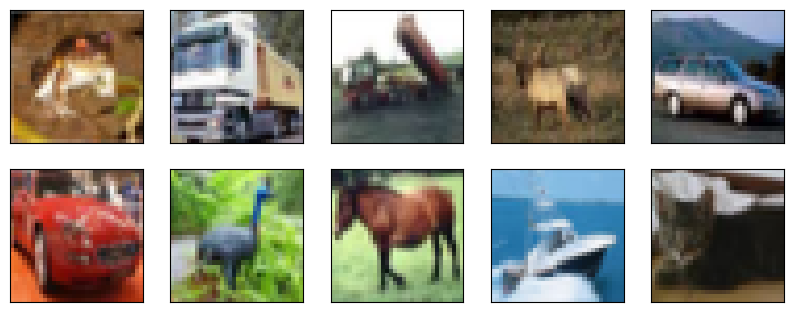

In [5]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(training_images_data[i], cmap=plt.cm.binary)

In [6]:
CNN_model = models.Sequential()
CNN_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
CNN_model.add(layers.MaxPooling2D((2, 2)))
CNN_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
CNN_model.add(layers.MaxPooling2D((2, 2)))
CNN_model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [7]:
CNN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

In [8]:
CNN_model.add(layers.Flatten())
CNN_model.add(layers.Dense(64, activation='relu'))
CNN_model.add(layers.Dense(10))
CNN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [9]:
CNN_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_model = CNN_model.fit(training_images_data, training_labels_data, epochs=10, 
                    validation_data=(testing_images_data, testing_labels_data))

Epoch 1/10
1563/1563 [==============================] - 77s 31ms/step - loss: 1.5604 - accuracy: 0.4282 - val_loss: 1.2948 - val_accuracy: 0.5374
Epoch 2/10
1563/1563 [==============================] - 42s 27ms/step - loss: 1.1700 - accuracy: 0.5826 - val_loss: 1.1226 - val_accuracy: 0.5977
Epoch 3/10
1563/1563 [==============================] - 43s 27ms/step - loss: 1.0106 - accuracy: 0.6454 - val_loss: 1.0019 - val_accuracy: 0.6485
Epoch 4/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.9082 - accuracy: 0.6832 - val_loss: 0.9255 - val_accuracy: 0.6737
Epoch 5/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.8395 - accuracy: 0.7057 - val_loss: 1.0129 - val_accuracy: 0.6526
Epoch 6/10
1563/1563 [==============================] - 43s 27ms/step - loss: 0.7836 - accuracy: 0.7254 - val_loss: 0.8761 - val_accuracy: 0.7026
Epoch 7/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.7333 - accuracy: 0.7431 - val_loss: 0.8569 -

313/313 [==============================] - 2s 8ms/step - loss: 0.9117 - accuracy: 0.6998


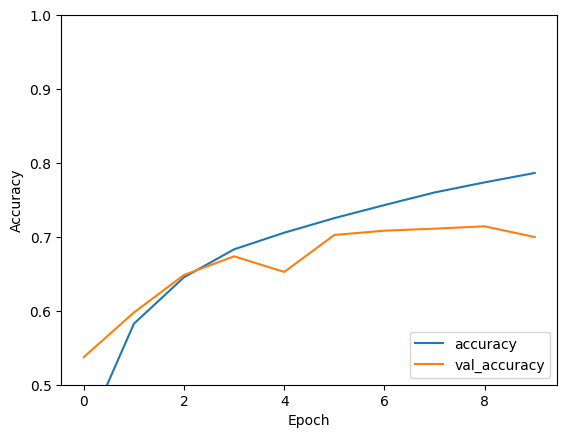

In [10]:
plt.plot(history_model.history['accuracy'], label='accuracy')
plt.plot(history_model.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

testing_loss, testing_acc = CNN_model.evaluate(testing_images_data,  testing_labels_data)